# Clasificator KNN

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [12]:
df = pd.read_csv("data/general_data.csv", index_col="EmployeeID")
# Select 3 columns to display basic knn clasificator 
target_df = df.loc[:, ['MonthlyIncome', 'TotalWorkingYears', 'Attrition' ]]
target_df

MonthlyIncome  TotalWorkingYears Attrition
EmployeeID                                            
1                  131160                1.0        No
2                   41890                6.0       Yes
3                  193280                5.0        No
4                   83210               13.0        No
5                   23420                9.0        No
...                   ...                ...       ...
4406                60290               10.0        No
4407                26790               10.0        No
4408                37020                5.0        No
4409                23980               10.0        No
4410                54680                NaN        No

[4410 rows x 3 columns]

<AxesSubplot: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

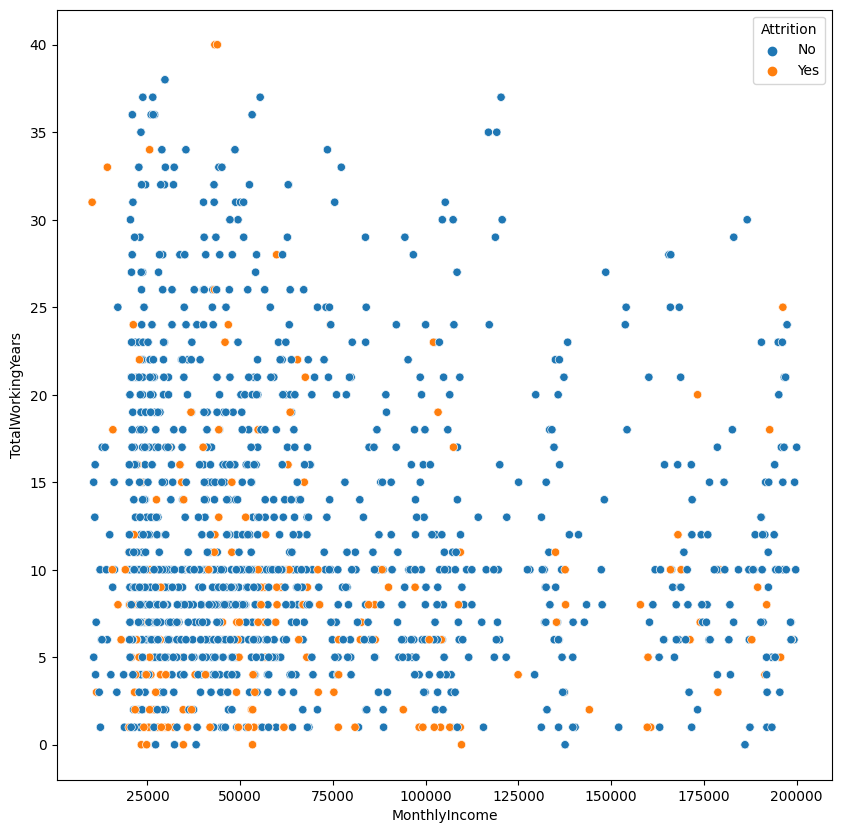

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=target_df, x="MonthlyIncome", y="TotalWorkingYears", hue="Attrition")

# Model Evaluation

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

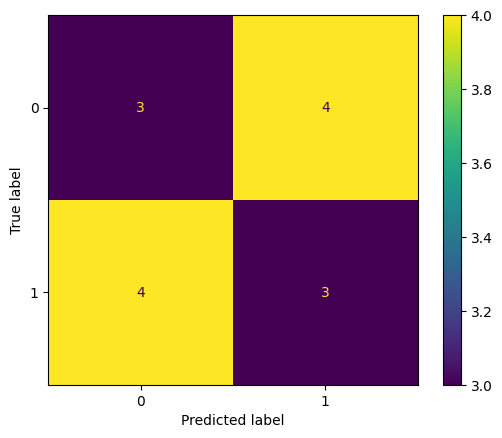

In [15]:
# basic evaluation with matrix test

before = [1,1,1,1,1,0,0,0,0,1,0,1,0,0]
reality = [1,1,0,0,0,1,0,1,0,0,1,1,0,1]

cm = confusion_matrix(reality, before)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [9]:
# Classification report (precision, recall, f1-score), test different average method

In [16]:
print(classification_report(reality, before))

              precision    recall  f1-score   support

           0       0.43      0.43      0.43         7
           1       0.43      0.43      0.43         7

    accuracy                           0.43        14
   macro avg       0.43      0.43      0.43        14
weighted avg       0.43      0.43      0.43        14



In [17]:
print(f1_score(reality,before, average='macro'))
print(precision_score(reality,before, average="weighted"))
print(recall_score(reality,before, average="micro"))

0.42857142857142855
0.42857142857142855
0.42857142857142855


# Exploratory analysis

In [20]:
plt.rcParams['figure.figsize'] = 20, 15

In [19]:
df.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [21]:
df.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [23]:
df.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace = True)

In [24]:
df.shape

(4410, 21)

In [26]:
df.head()

Age Attrition     BusinessTravel              Department  \
EmployeeID                                                             
1            51        No      Travel_Rarely                   Sales   
2            31       Yes  Travel_Frequently  Research & Development   
3            32        No  Travel_Frequently  Research & Development   
4            38        No         Non-Travel  Research & Development   
5            32        No      Travel_Rarely  Research & Development   

            DistanceFromHome  Education EducationField  Gender  JobLevel  \
EmployeeID                                                                 
1                          6          2  Life Sciences  Female         1   
2                         10          1  Life Sciences  Female         1   
3                         17          4          Other    Male         4   
4                          2          5  Life Sciences    Male         3   
5                         10          1        Medical    Male         1   

                              JobRole  ... MonthlyIncome  NumCompaniesWorked  \
EmployeeID                             ...                                     
1           Healthcare Representative  ...        131160                 1.0   
2                  Research Scientist  ...         41890                 0.0   
3                     Sales Executive  ...        193280                 1.0   
4                     Human Resources  ...         83210                 3.0   
5                     Sales Executive  ...         23420                 4.0   

            Over18 PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
EmployeeID                                                                  
1                Y                11                 0                1.0   
2                Y                23                 1                6.0   
3                Y                15                 3                5.0   
4                Y                11                 3               13.0   
5                Y                12                 2                9.0   

            TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
EmployeeID                                                                   
1                               6               1                        0   
2                               3               5                        1   
3                               2               5                        0   
4                               5               8                        7   
5                               2               6                        0   

            YearsWithCurrManager  
EmployeeID                        
1                              0  
2                              4  
3                              3  
4                              5  
5                              4  

[5 rows x 21 columns]

In [28]:
# divide dataset into numerical and caterogical columns

In [29]:
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values)
cat_cols = list(df.dtypes[df.dtypes == 'object'].index.values)

In [30]:
num_cols

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [31]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [32]:
# Attrition is target value. Change to numerical data with category encoding

In [33]:
df_numeric = df.loc[:, num_cols]
df['Attrition'] = df['Attrition'].astype('category')
df_numeric['Attrition_num'] = df.Attrition.cat.codes
df_numeric.shape

(4410, 14)

In [34]:
df_numeric.head()

Age  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
EmployeeID                                                              
1            51                 6          2         1         131160   
2            31                10          1         1          41890   
3            32                17          4         4         193280   
4            38                 2          5         3          83210   
5            32                10          1         1          23420   

            NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
EmployeeID                                                            
1                          1.0                 11                 0   
2                          0.0                 23                 1   
3                          1.0                 15                 3   
4                          3.0                 11                 3   
5                          4.0                 12                 2   

            TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
EmployeeID                                                             
1                         1.0                      6               1   
2                         6.0                      3               5   
3                         5.0                      2               5   
4                        13.0                      5               8   
5                         9.0                      2               6   

            YearsSinceLastPromotion  YearsWithCurrManager  Attrition_num  
EmployeeID                                                                
1                                 0                     0              0  
2                                 1                     4              1  
3                                 0                     3              0  
4                                 7                     5              0  
5                                 0                     4              0

In [35]:
# Removal of NaN values

In [36]:
df_numeric.notna().all(axis = 1)

EmployeeID
1        True
2        True
3        True
4        True
5        True
        ...  
4406     True
4407     True
4408     True
4409     True
4410    False
Length: 4410, dtype: bool

In [38]:
df_numeric = df_numeric.loc[df_numeric.notna().all(axis=1), :]
df_numeric.shape

(4382, 14)

In [39]:
# Correlation

In [41]:
df_numeric.corr()['Attrition_num'].sort_values()

TotalWorkingYears         -0.169670
Age                       -0.158399
YearsWithCurrManager      -0.154692
YearsAtCompany            -0.133003
TrainingTimesLastYear     -0.047586
YearsSinceLastPromotion   -0.031423
MonthlyIncome             -0.030160
Education                 -0.017106
JobLevel                  -0.012382
DistanceFromHome          -0.009449
StockOptionLevel          -0.008164
PercentSalaryHike          0.033153
NumCompaniesWorked         0.042831
Attrition_num              1.000000
Name: Attrition_num, dtype: float64

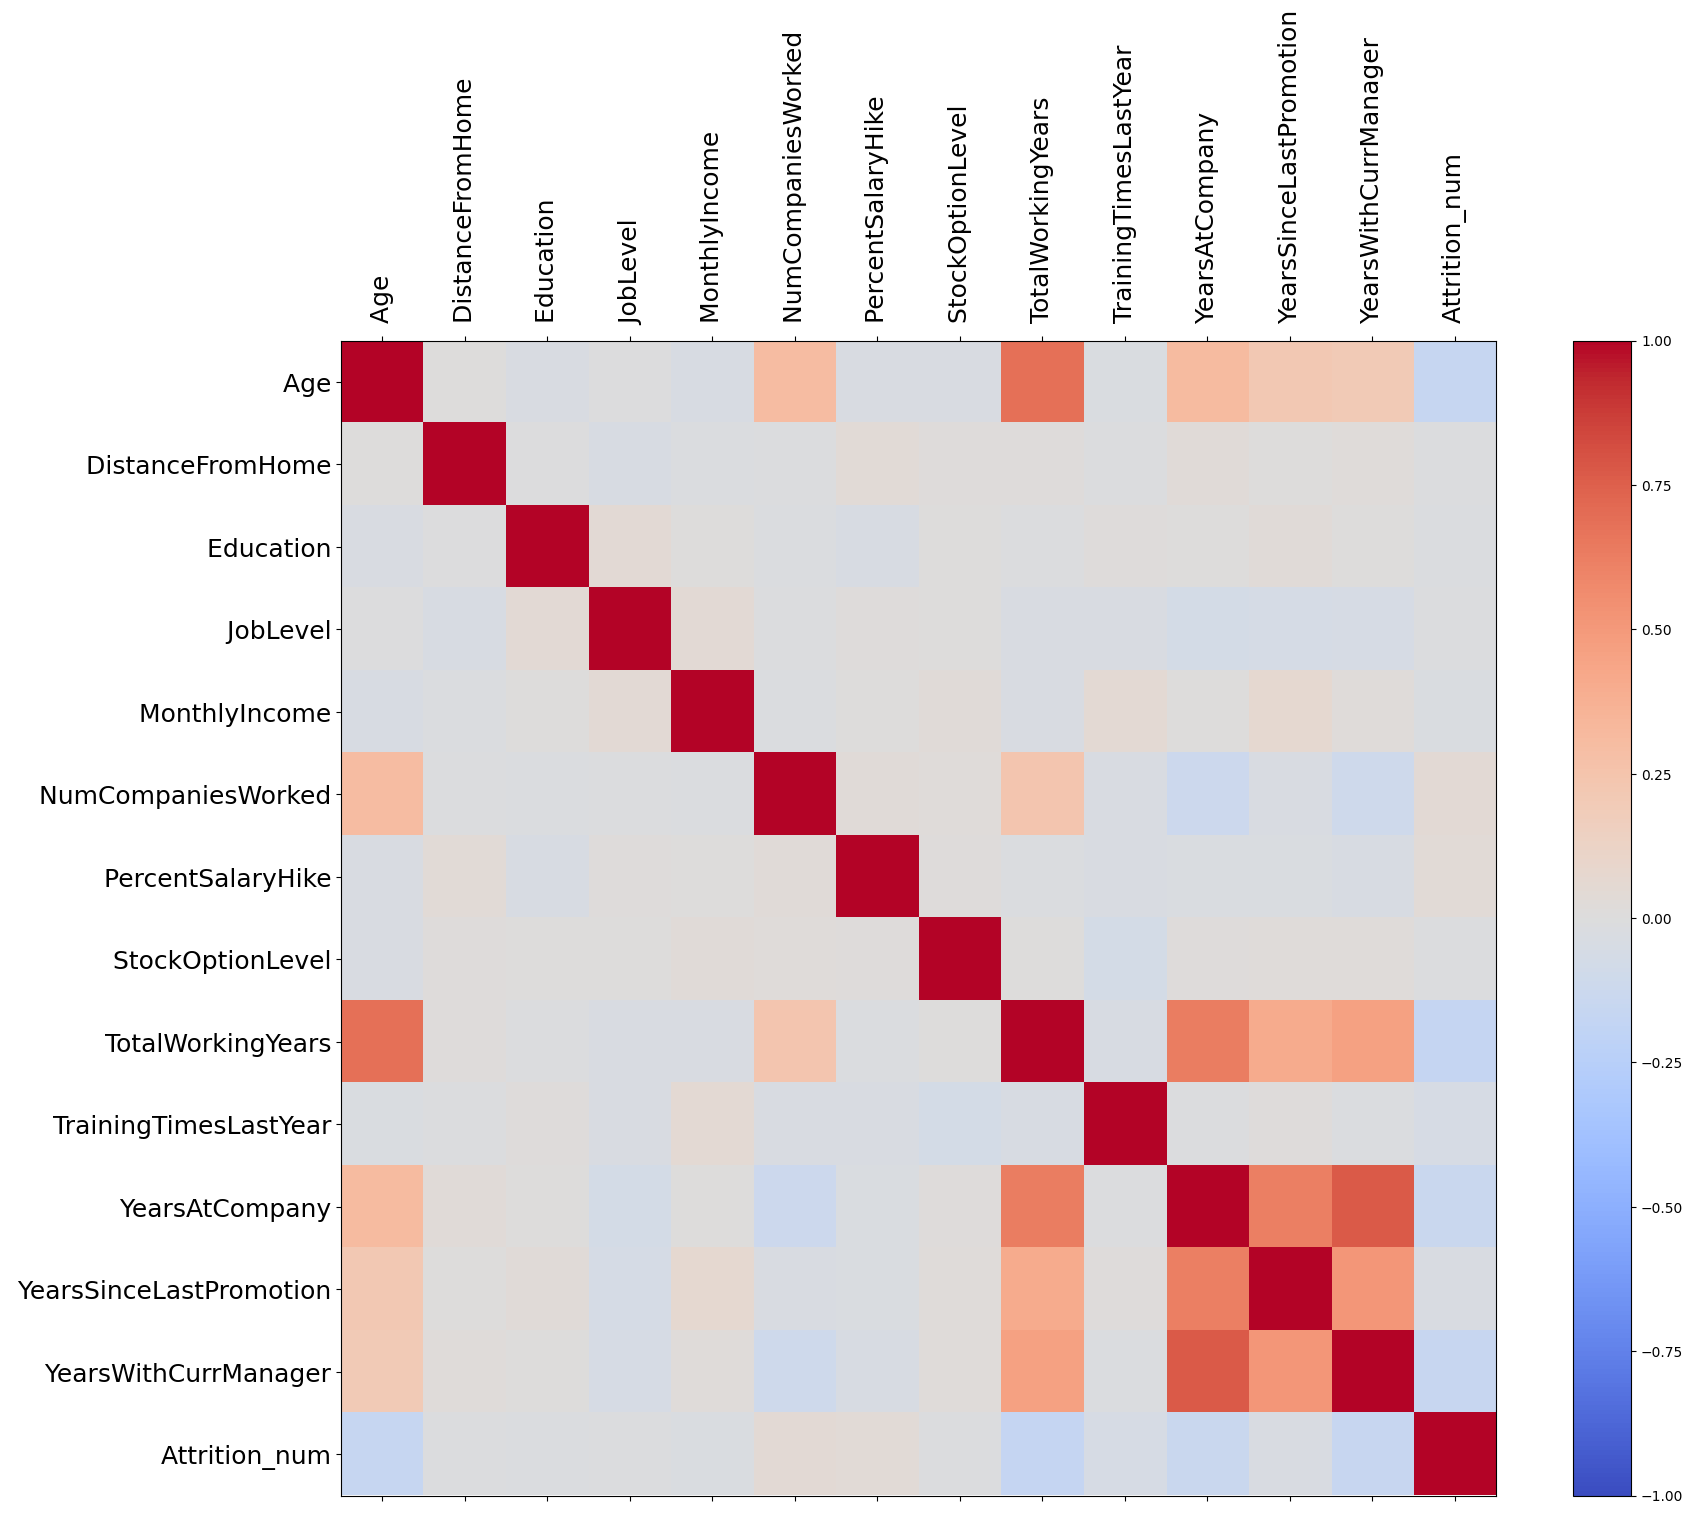

In [42]:
x = df_numeric
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>,
        <AxesSubplot: title={'center': 'StockOptionLevel'}>],
       [<AxesSubplot: title={'center': 'TotalWorkingYears'}>,
        <AxesSubplot: title={'center': 'TrainingTimesLastYear'}>,
        <AxesSubplot: title={'center': 'YearsAtCompany'}>,
        <AxesSubplot: title={'center': 'YearsSinceLastPromotion'}>],
       [<AxesSubplot: title={'center': 'YearsWithCurrManager'}>,
        <AxesSubplot: title={'center': 'Attrition_num'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

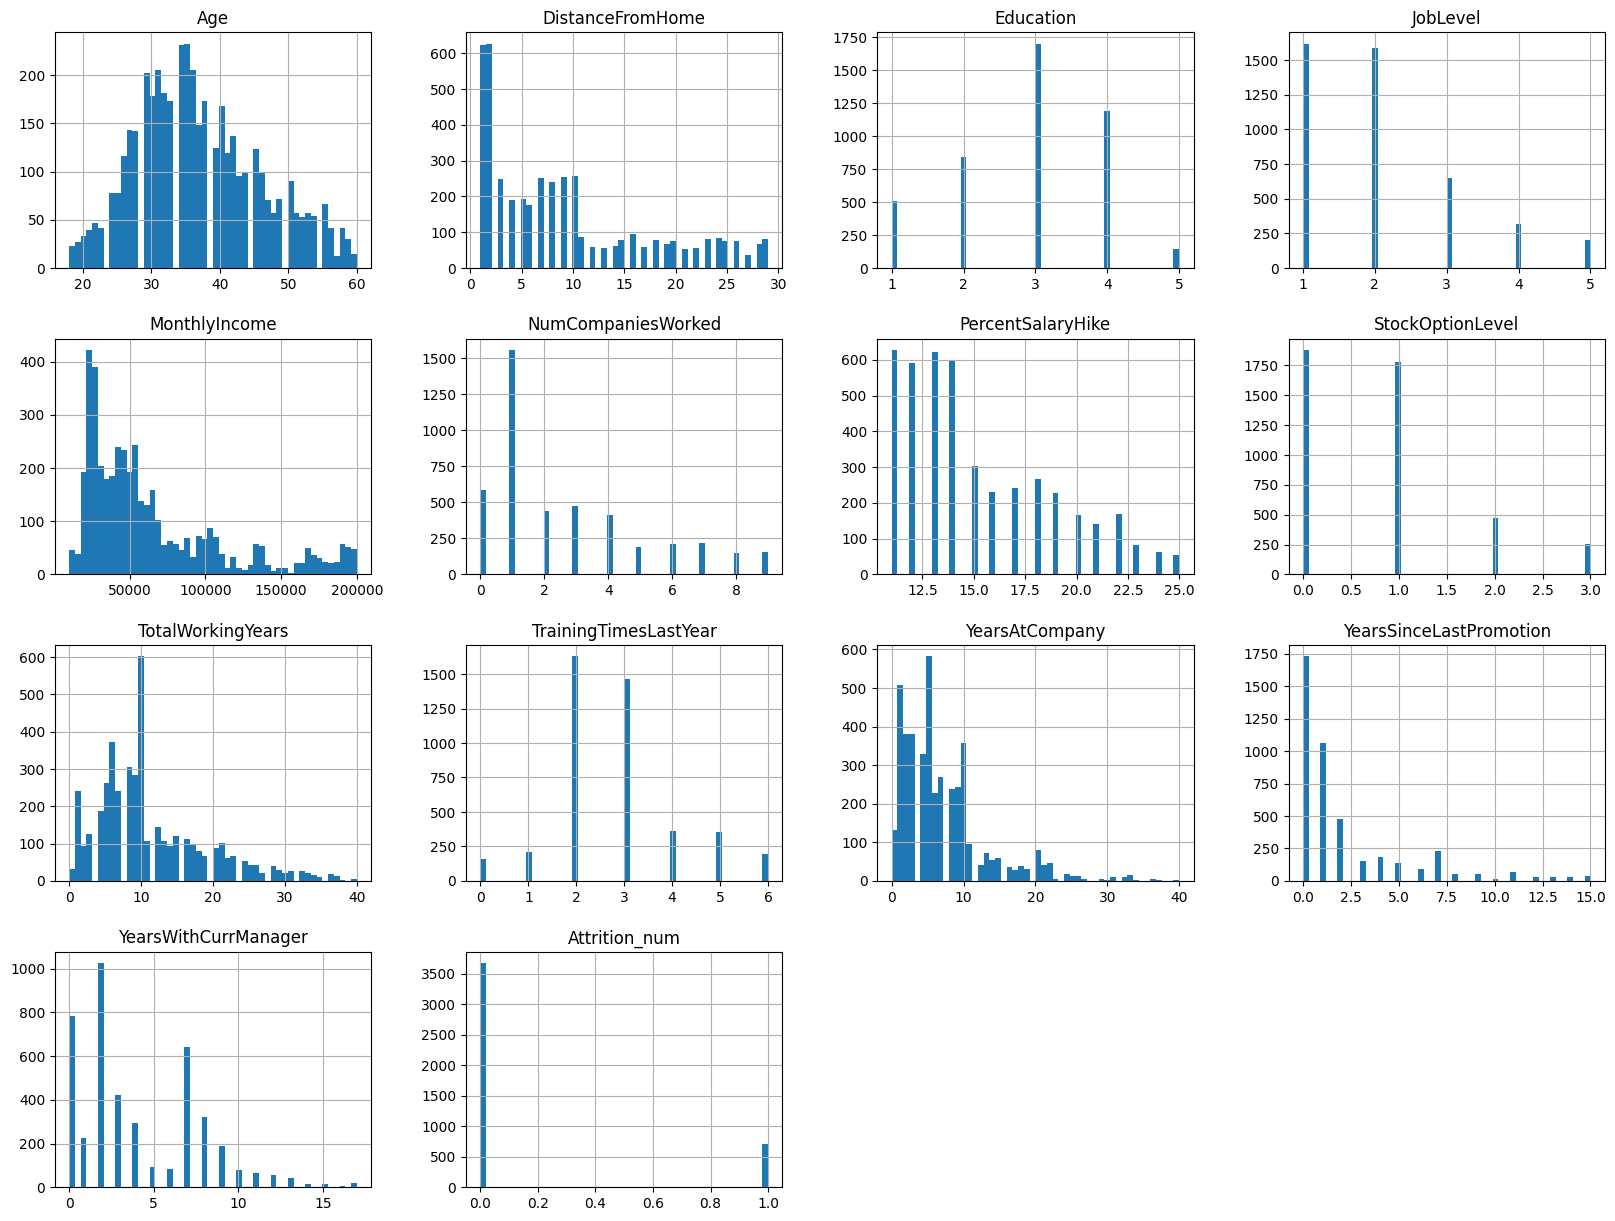

In [43]:
df_numeric.hist(bins=50)

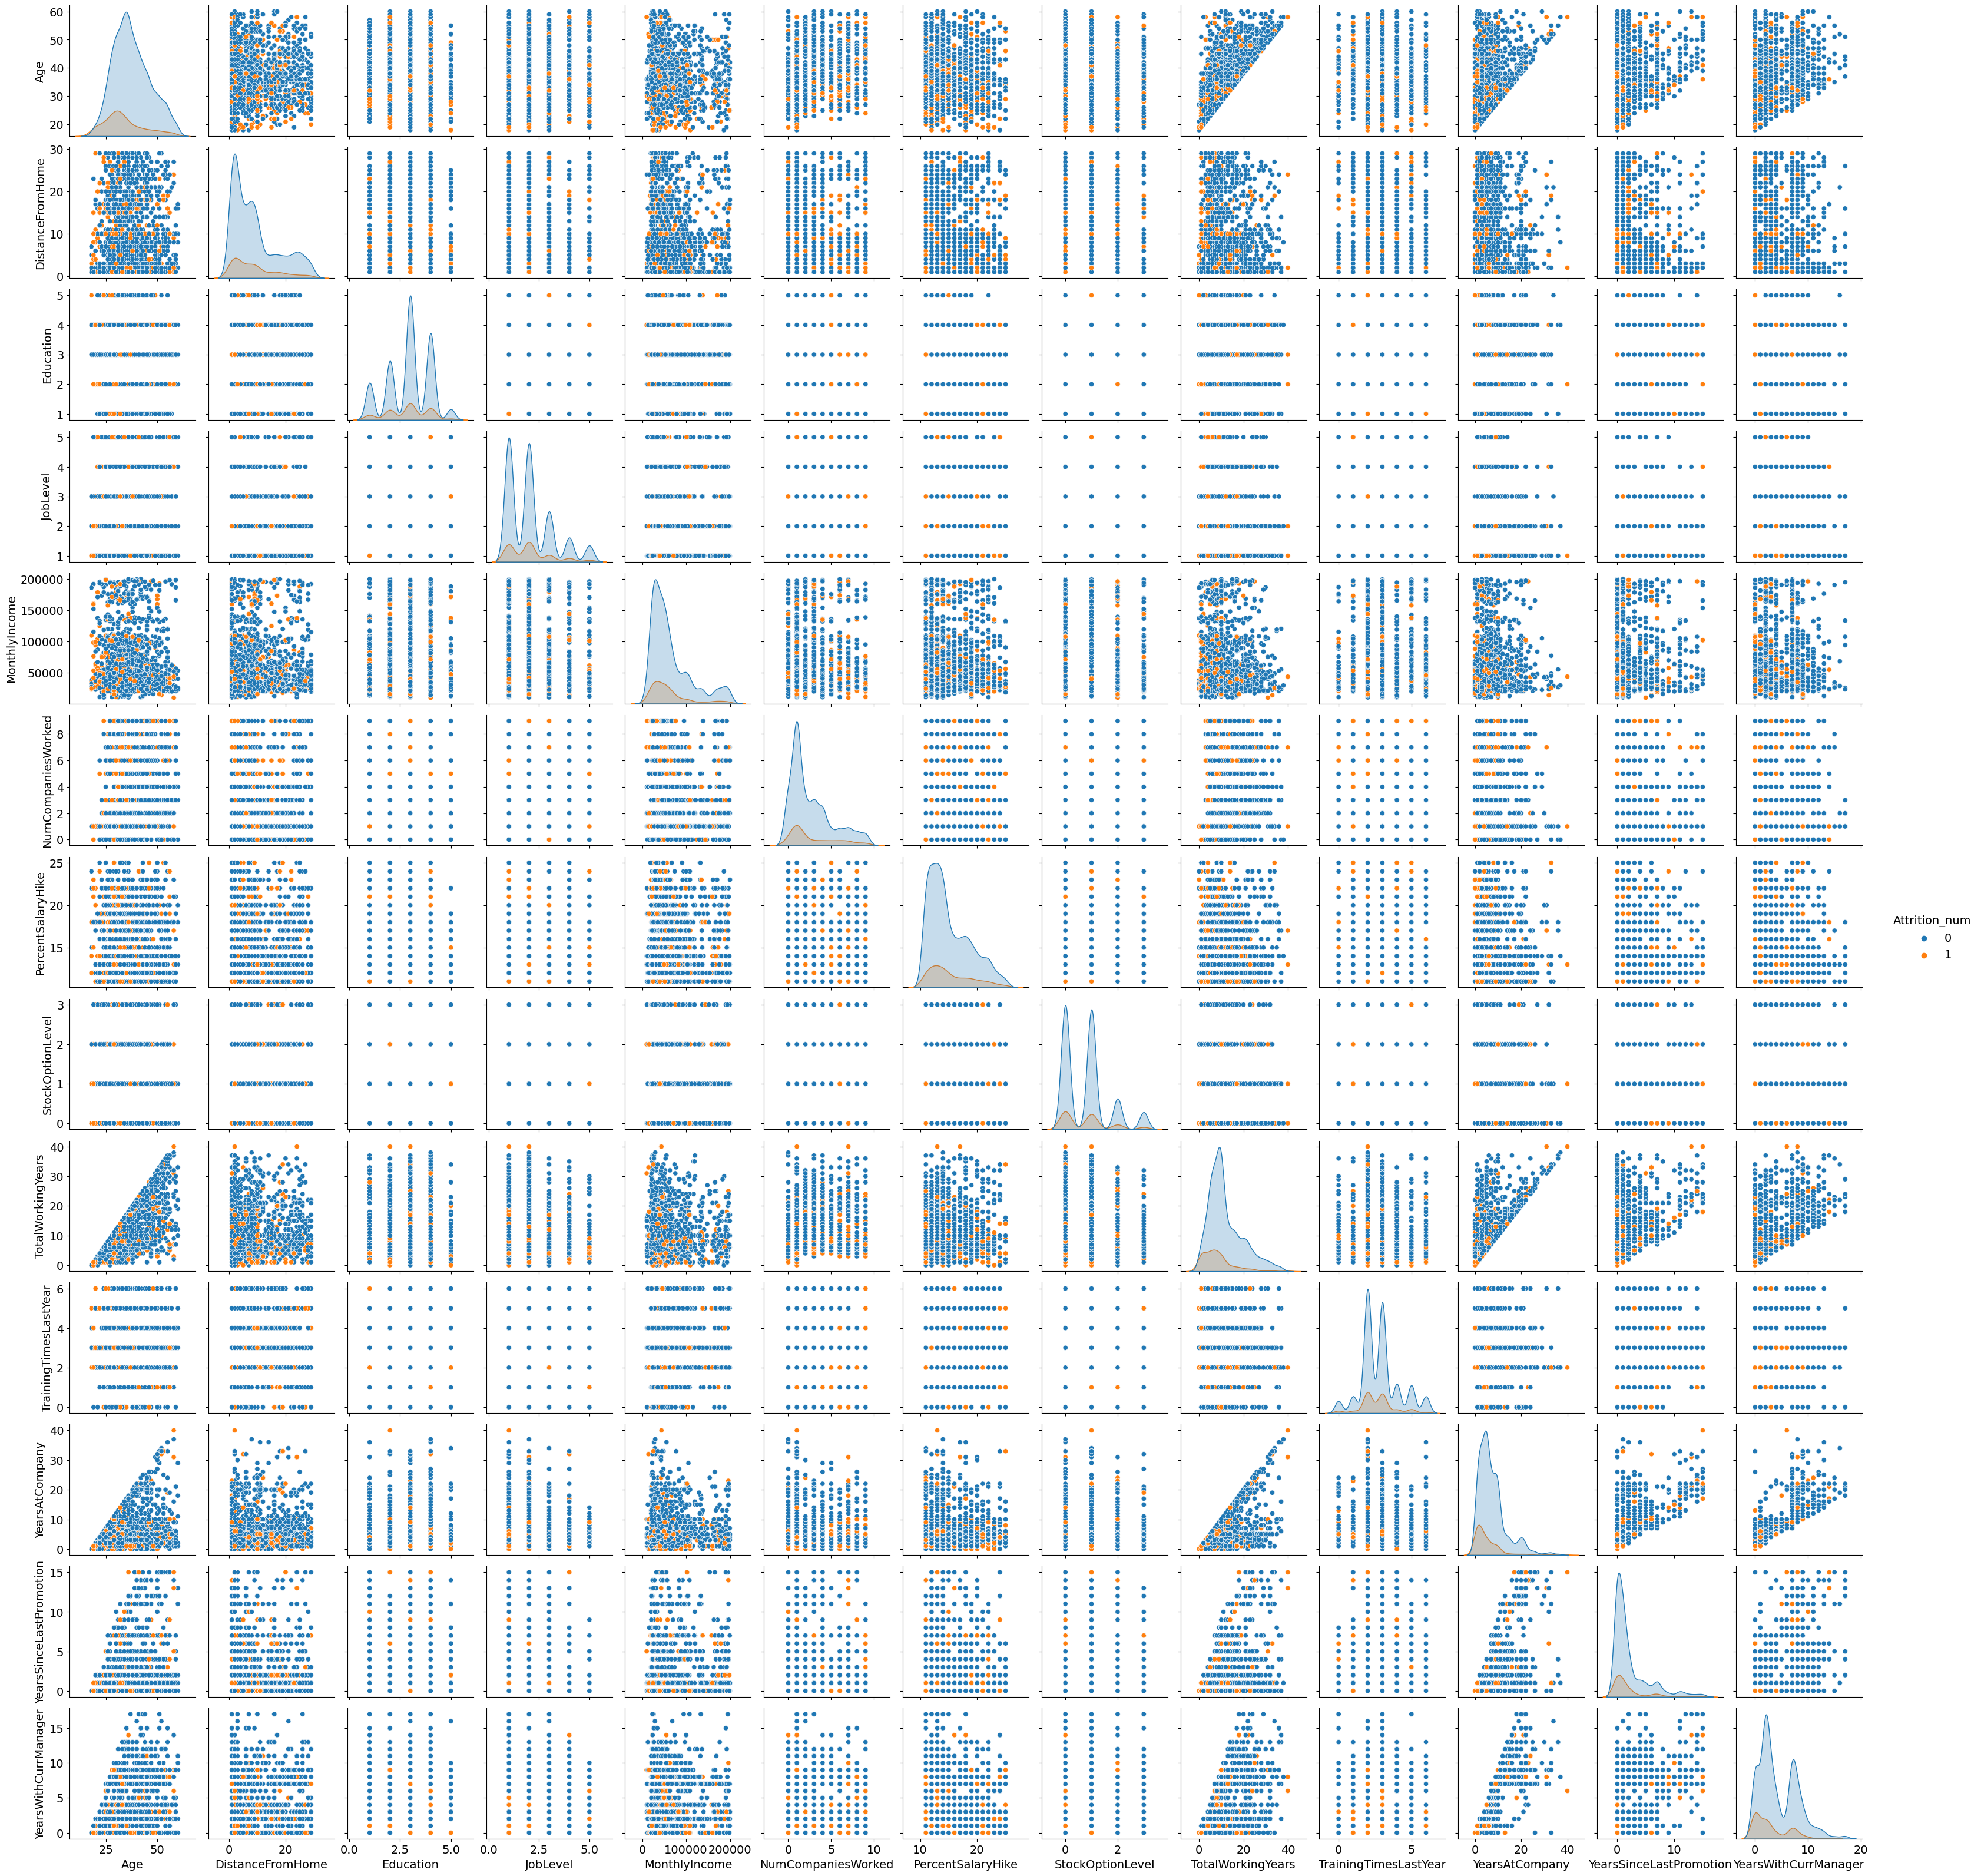

In [44]:
plt.rcParams['figure.figsize'] = 30, 25
dic = {"size": 14}
matplotlib.rc('font', **dic)

sns.pairplot(df_numeric, hue='Attrition_num', )

In [45]:
# save processed data into folder

In [46]:
df_numeric.to_csv("processed_data/numerical.csv")